In [119]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [120]:
df = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = df.iloc[:,1:2].values
df.shape

(1258, 6)

In [121]:
# feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [122]:
# creating data with 60 timesteps
X_train = []
y_train = []
# till 59 th time step we look at the stock open values that is our training data
# our value at the 60 th step ie we are trying to predict is our y_train
for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train,y_train = np.array(X_train),np.array(y_train)
# reshaping
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [123]:
import tensorflow as tf

In [124]:
#initialize the RNN
RNN = tf.keras.models.Sequential()

### Adding LSTM layers with some Dropout regularization

In [125]:
# Adding first LSTM layer and dropout regularization
RNN.add(tf.keras.layers.LSTM(units =50 , return_sequences= True, input_shape = (X_train.shape[1], 1)))
RNN.add(tf.keras.layers.Dropout(0.2))

In [126]:
# Adding second LSTM layer and dropout regularization
RNN.add(tf.keras.layers.LSTM(units =50 , return_sequences= True))
RNN.add(tf.keras.layers.Dropout(0.2))

In [127]:
# Adding third LSTM layer and dropout regularization
RNN.add(tf.keras.layers.LSTM(units =50 , return_sequences= True))
RNN.add(tf.keras.layers.Dropout(0.2))

In [128]:
# Adding fourth LSTM layer and dropout regularization
RNN.add(tf.keras.layers.LSTM(units =50))
RNN.add(tf.keras.layers.Dropout(0.2))

In [129]:
# Adding the output dense layer
RNN.add(tf.keras.layers.Dense(units =1))

#### Compile the RNN

In [130]:
RNN.compile(optimizer='adam',loss = 'mean_squared_error')

#### Training the model

In [131]:
RNN.fit(X_train,y_train,epochs = 100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 16s 119ms/step - loss: 0.0460
Epoch 2/100
38/38 [==============================] - 5s 128ms/step - loss: 0.0062
Epoch 3/100
38/38 [==============================] - 4s 109ms/step - loss: 0.0058 1s - 
Epoch 4/100
38/38 [==============================] - 5s 132ms/step - loss: 0.0049
Epoch 5/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0055
Epoch 6/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0054
Epoch 7/100
38/38 [==============================] - 5s 133ms/step - loss: 0.0046
Epoch 8/100
38/38 [==============================] - 4s 118ms/step - loss: 0.0041
Epoch 9/100
38/38 [==============================] - 5s 126ms/step - loss: 0.0043
Epoch 10/100
38/38 [==============================] - 4s 102ms/step - loss: 0.0041
Epoch 11/100
38/38 [==============================] - 4s 96ms/step - loss: 0.0040: 0s - loss: 
Epoch 12/100
38/38 [==============================] - 4s 96ms/step - loss: 0.

In [132]:
# loading the test data
df_2 = pd.read_csv('Google_Stock_Price_Test.csv')
test_set = df_2.iloc[:,1:2].values
dataset_total = pd.concat((df['Open'],df_2['Open']),axis=0)

In [133]:
inputs = dataset_total[len(dataset_total)-len(df_2)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test =[]
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = RNN.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Visualizing the predicted and real stock price

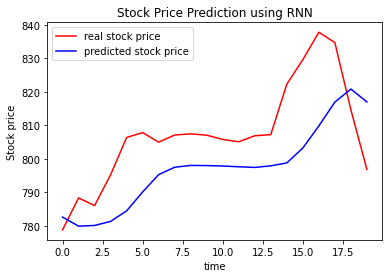

In [134]:
plt.plot(test_set,color = 'red',label = 'real stock price')
plt.plot(predicted_stock_price,color = 'blue',label = 'predicted stock price')
plt.title('Stock Price Prediction using RNN')
plt.xlabel('time')
plt.ylabel('Stock price')
plt.legend()
plt.show()